# Consumer Complaints

### Requirements

- No PEP8 or Pyflakes warnings or errors
- Make sure your directory has its own virtual environment (.envrc), but do not commit .envrc or .direnv to Git.
- Make sure you do not commit __pycache__, .ipynb_checkpoints, .envrc, .direnv, and .DS_Store files to Git.
- Make sure the requirements can be installed using pip install -r requirements.txt

## Normal Mode

### Calculate and chart:
- Number of complaints by product
- Number of complaints by company (top 10 companies only)
- Number of complaints by company response
- Mean number of complaints by day of week
- Any other insights you find interesting

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

In [131]:
#!head complaints_dec_2014.csv
comp = pd.read_csv('complaints_dec_2014.csv')

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


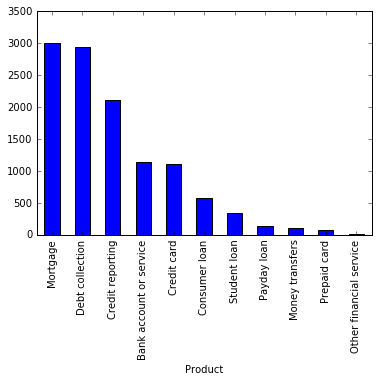

In [121]:
# Number of complaints by Product
complaints_by_product = comp.groupby('Product').size().sort_values(ascending=False)
complaints_by_product.plot(kind='bar')

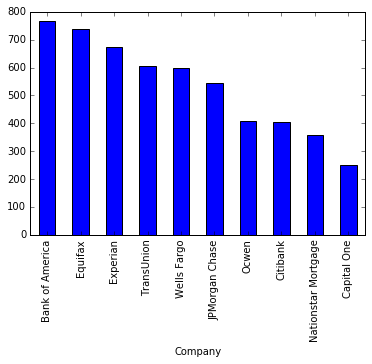

In [122]:
# Number of complaints by Company (only top 10)
complaints_by_company = comp.groupby('Company').size().sort_values(ascending=False).head(n=10)
complaints_by_company.plot(kind='bar')

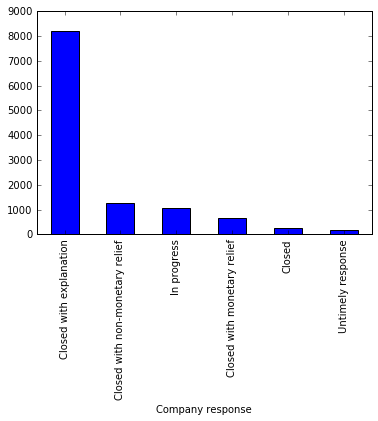

In [123]:
# Number of complaints by company response
complaints_by_company_response = comp.groupby('Company response').size().sort_values(ascending=False)
complaints_by_company_response.plot(kind='bar')

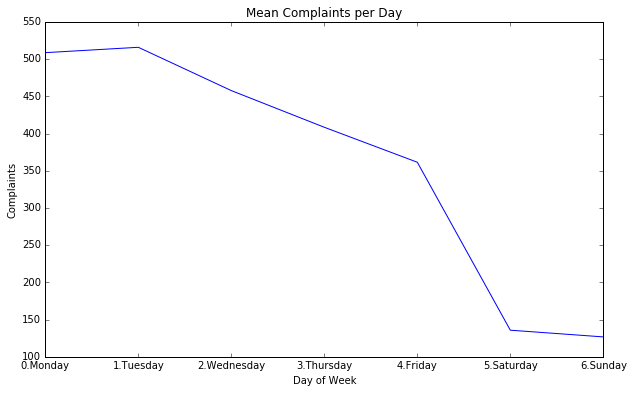

In [124]:
# Mean number of complaints by day of week
days=["0.Monday","1.Tuesday","2.Wednesday","3.Thursday","4.Friday","5.Saturday","6.Sunday"]
comp['day'] = pd.to_datetime(comp['Date received']).map(lambda d: days[d.weekday()])

means = comp.groupby(['day','Date received']).size().groupby(level=0).mean()

mean_plot = means.plot(title='Mean Complaints per Day', figsize=(10,6), legend=False)
mean_plot.set_xlabel("Day of Week")
mean_plot.set_ylabel("Complaints")

## Advanced Mode
- Combine the complaints data with US population by state data (find this yourself) and then chart the frequency of complaints by state per capita.
- Find statistically significant outliers of complaints by ZIP code. Look these up to see if there's a possible reason (military bases are often surrounded by predatory lending companies, for example.)

In [128]:
#US population by state data
census = pd.read_csv('census.csv')

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'AE': 'Not a state',
        'AP': 'Not a state',
    
}

In [126]:
#comp['STATE'] = comp['State'].map(lambda d: states[d])

state_data = DataFrame({'Dec Complaints': comp.groupby('State').size()}).reset_index()

state_data['NAME'] = state_data['State'].map(lambda s: states[s])
state_data.head()

,State,Dec Complaints,NAME
0,AE,5,Not a state
1,AK,15,Alaska
2,AL,147,Alabama
3,AP,1,Not a state
4,AR,59,Arkansas


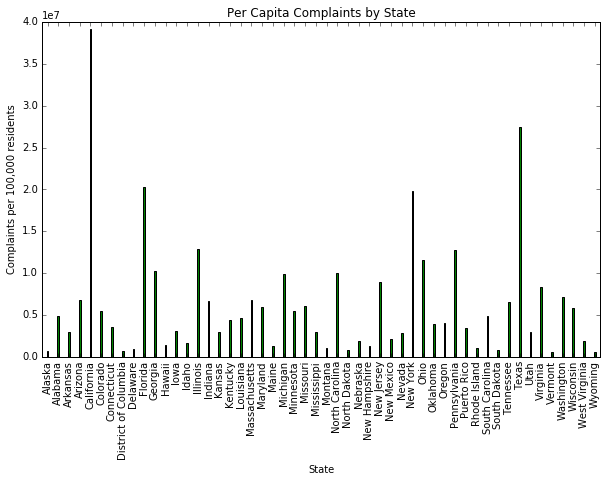

In [127]:
# https://www.census.gov/popest/data/national/totals/2015/files/NST-EST2015-alldata.pdf

combined = pd.merge(state_data, census, on='NAME', how='left')[['NAME', 'Dec Complaints', 'POPESTIMATE2015']].dropna()
combined['Complaints Per 100,000'] = combined['Dec Complaints'] / combined['POPESTIMATE2015'] * 100000
combined_plot = combined.plot(x='NAME', kind='bar', title='Per Capita Complaints by State', figsize=(10,6), legend=False)
combined_plot.set_xlabel("State")
combined_plot.set_ylabel("Complaints per 100,000 residents")

In [144]:
# Had some trouble with this one.

zip_pop = pd.read_csv('census_zip.csv')
zip_pop["ZIP code"] = zip_pop["Zip Code ZCTA"].map(lambda x: float(x))
zip_pop = zip_pop[["ZIP code", "2010 Census Population"]]
zip_pop.head()
zip_comp = pd.merge(state_data, zip_pop, on="ZIP code", how='inner')[["ZIP code", "2010 Census Population", "Dec Complaints"]]

KeyError: 'ZIP code'

## Epic Mode
- Take the frequency of complaints by state per capita and then make a chart of the US, with frequency of complaints matched to a scale of lighter color (low frequency) to darker color (high frequency), with a legend.

In [ ]:
# :( Cannot figure out how to get Basemaps installed...